In [1]:
import numpy as np  # Mengimpor modul NumPy 
import matplotlib.pyplot as plt  # Mengimpor modul pyplot dari matplotlib
%matplotlib inline  
import cv2  # Mengimpor modul cv2 dari OpenCV
import matplotlib.image as mpimg  # Mengimpor modul image dari matplotlib dan mengin
from skimage import data  # Mengimpor modul data dari scikit-image


In [2]:
image = cv2.imread("gedung.tif", cv2.IMREAD_GRAYSCALE) # Membaca Gambar

In [3]:
image_equalized = cv2.equalizeHist(image) # Melakukan equalisasi histogram pada gambar

In [4]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) # Membuat objek CLAHE dengan batas kontras dan ukuran grid yang ditentukan

#Apply CLAHE to the original image
image_clahe = clahe.apply(image) # Mengaplikasikan CLAHE ke gambar 

In [5]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0], image.shape[1]), dtype='uint8') # Membuat array kosong 

# Apply Min-Max Contrasting
# Menentukan nilai minimum dan maksimum dari gambar
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]): # Melakukan perulangan untuk setiap piksel pada gambar.
    for j in range(image.shape[1]): # Mengaplikasikan kontras Min-Max ke setiap piksel.
        image_cs[i, j] = 255 * (image[i, j] - min) / (max - min) # Hasilnya disimpan dalam array 'image_cs'


In [6]:
copyCamera = image.copy().astype(float) # Membuat salinan gambar 'image'

m1, n1 = copyCamera.shape # Mengambil dimensi gambar 
output1 = np.empty([m1, n1]) # Membuat array kosong 

# Menyimpan nilai baris dan kolom dalam variabel 'a1' dan 'b1'
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom

        output1[a1, b1] = copyCamera[baris, kolom] * 1.9 # Mengalikan nilai piksel 
        


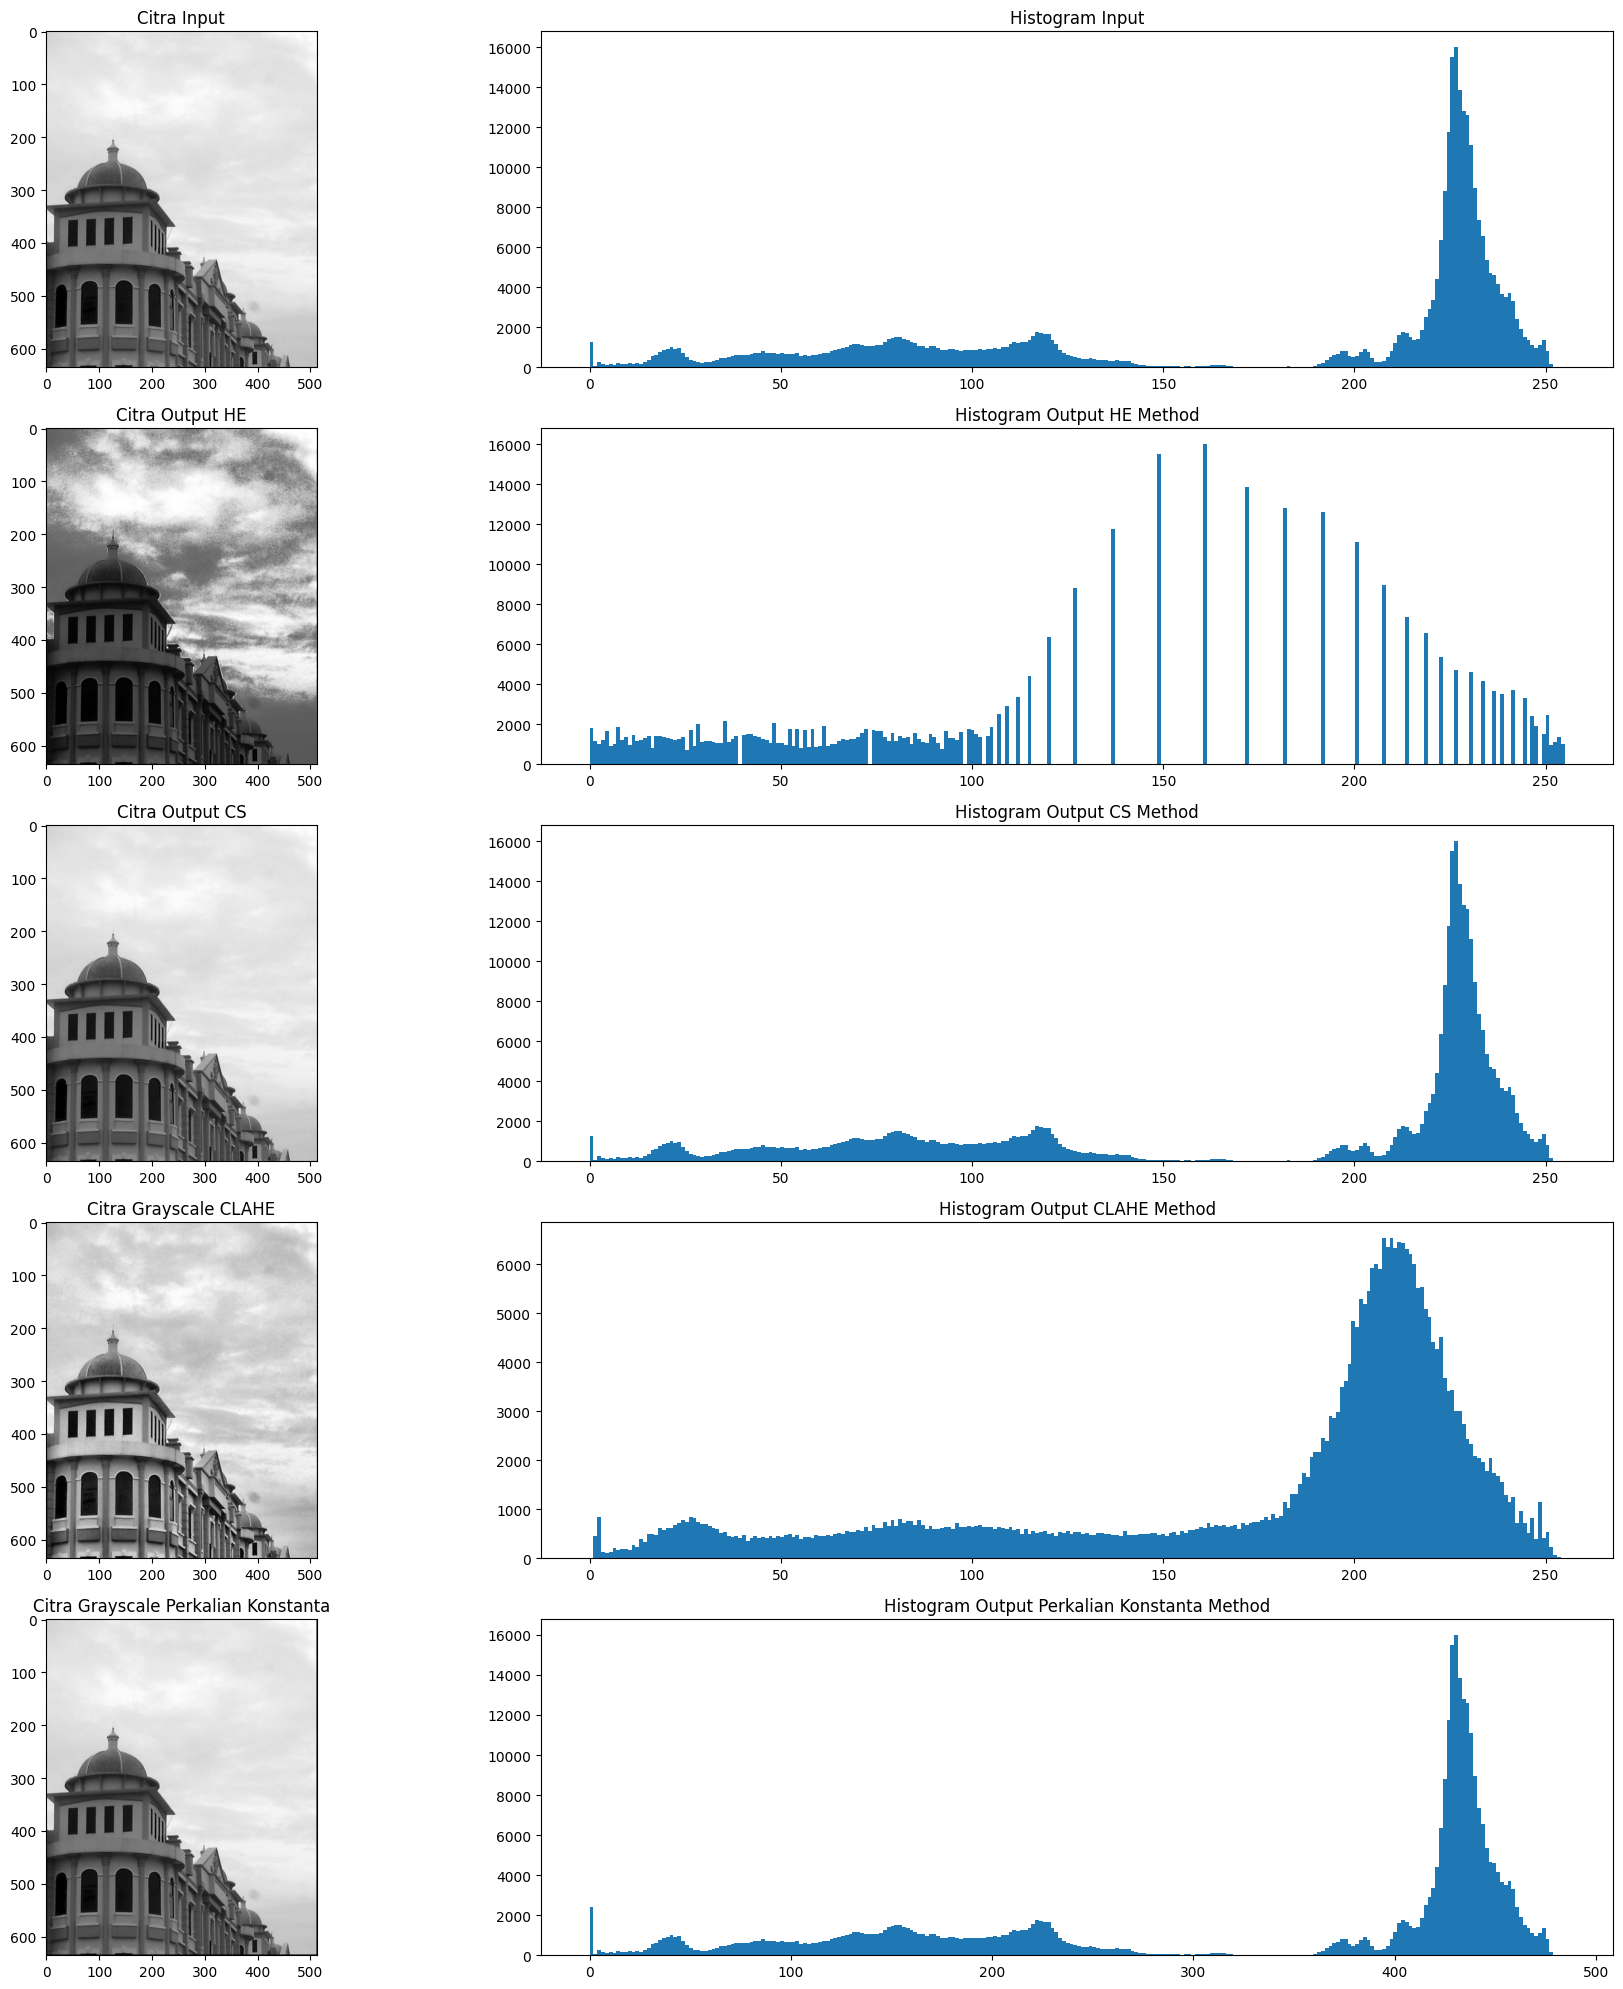

In [7]:
# Membuat subplots dengan ukuran 5x2 untuk menampilkan beberapa gambar dan histogram
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

# Menampilkan citra input dan histogramnya pada sumbu pertama dan kedua
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra hasil equalisasi histogram dan histogramnya pada sumbu ketiga dan keempat
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra hasil kontras stretching dan histogramnya pada sumbu kelima dan keenam
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra grayscale hasil CLAHE dan histogramnya pada sumbu ketujuh dan kedelapan
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra grayscale hasil perkalian konstanta dan histogramnya pada sumbu kesembilan dan kesepuluh
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')


fig.tight_layout() # Mengatur tata letak
